<a href="https://colab.research.google.com/github/naidu1997/Machine-Learning/blob/main/DB_Scan_clustering_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np #linear algebra
import pandas as pd #creating and manipulating dataframes
import matplotlib.pyplot as plt #visuals
import seaborn as sns#visuals
from sklearn.cluster import DBSCAN #DBSCAN
from sklearn.preprocessing import StandardScaler #scaler


In [4]:
data= pd.read_csv('/content/archive (22).zip')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [16]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
data.shape

(200, 5)

In [20]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='CustomerID'>

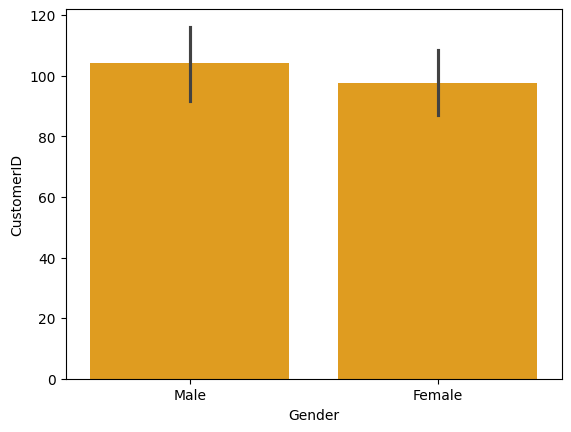

In [24]:
#visualization
sns.barplot(x='Gender',y='CustomerID',data=data,color= 'orange')


<Axes: xlabel='CustomerID', ylabel='Annual Income (k$)'>

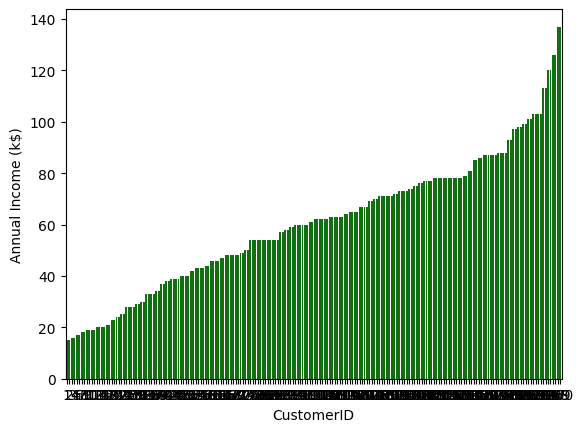

In [28]:
sns.barplot(x='CustomerID',y='Annual Income (k$)',data=data,color= 'green')

<Axes: xlabel='Age', ylabel='Count'>

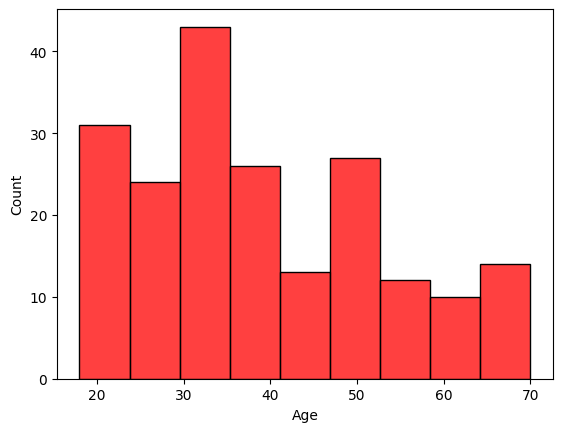

In [33]:
sns.histplot(x='Age',data=data,color= 'red')

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

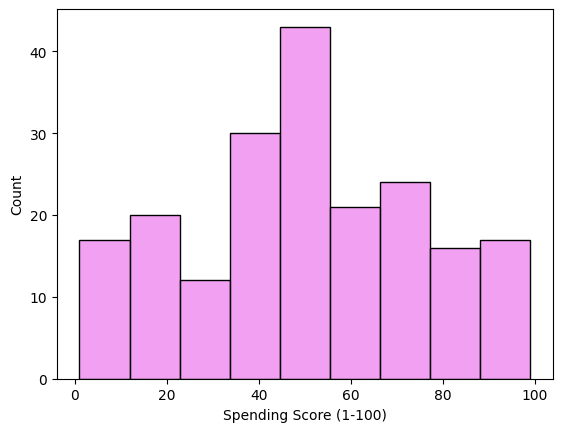

In [35]:
sns.histplot(x='Spending Score (1-100)',data=data,color= 'violet')

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

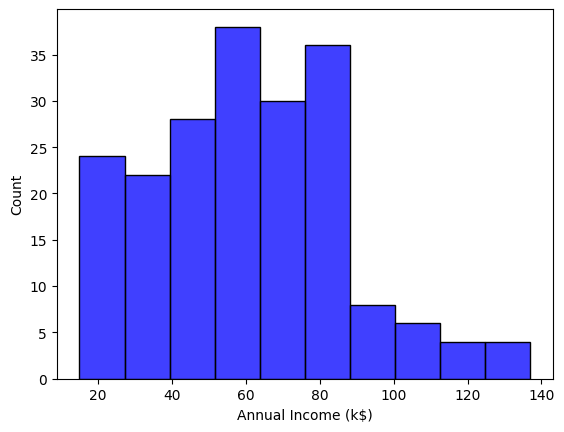

In [38]:
sns.histplot(x='Annual Income (k$)',data=data,color= 'blue')

In [47]:
#to extract the values
x= data.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [48]:
db= DBSCAN(eps=2,min_samples=3)

In [54]:
model= db.fit(x)

In [56]:
labels= model.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1,  1,  2,  1, -1, -1,  2,  3,  2,  3,  2,  2,
        3,  2, -1, -1, -1, -1,  4,  5,  5,  4,  5,  4,  5,  5,  4,  4,  5,
        4, -1, -1, -1, -1, -1,  6,  7,  6,  6,  7,  7,  7,  6,  7,  6,  7,
       -1,  7,  7,  6,  7,  7,  6,  7,  7,  7,  6,  7,  7,  7,  6, -1,  6,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  8, -1,
        8, -1, -1, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1,  9, -1,  9, -1,
       -1, -1,  9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       10, -1, -1, -1, 10, -1, 10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [58]:
from sklearn import metrics


In [60]:
sample_cores= np.zeros_like(labels,dtype=bool)
sample_cores

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [61]:
print(metrics.silhouette_score(x,labels))

-0.2947955273217612
